# Используемые библиотеки

In [260]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics.cluster import contingency_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

# Данные

In [287]:
train = pd.read_csv('train.csv', parse_dates=['Крайний срок', 'Дата обращения', 'Дата закрытия обращения', 'Дата восстановления'])
train.head()

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42:00,2018-01-19 09:27:00,Запрос,Запрос,Тест,0,NaT,2018-01-19 09:43:00,4-Нет,3-Малое,База,К
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51:00,2018-01-19 09:36:00,Запрос,Запрос,Тест,0,NaT,2018-01-19 09:41:00,4-Нет,3-Малое,База,К
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51:00,2018-01-25 22:47:00,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47:00,2018-02-02 07:52:00,1-Особая,3-Малое,Система7,Место190
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50:00,2018-01-25 23:13:00,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55:00,2018-01-26 00:00:00,4-Нет,3-Малое,База,Место177
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51:00,2018-01-25 23:39:00,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54:00,2018-02-04 07:53:00,4-Нет,4-Нет влияния,База,Место216


In [288]:
train.dtypes

Содержание                                object
Сервис                                    object
Приоритет                                 object
Статус                                    object
Функциональная группа                     object
Крайний срок                      datetime64[ns]
Дата обращения                    datetime64[ns]
Тип обращения на момент подачи            object
Тип обращения итоговый                    object
Решение                                   object
Тип переклассификации                      int64
Дата восстановления               datetime64[ns]
Дата закрытия обращения           datetime64[ns]
Критичность                               object
Влияние                                   object
Система                                   object
Место                                     object
dtype: object

In [289]:
test = pd.read_csv('test.csv', parse_dates=['Крайний срок', 'Дата обращения', 'Дата закрытия обращения', 'Дата восстановления'])
test.head()

,id,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,14803,Заявка на предоставление и отзыв прав доступа ...,Сервис41,3-Низкий,Закрыт,ФГ13,2018-02-22 07:51:00,2018-02-16 13:11:00,Запрос,NaN,Работы по обращению выполнены,NaN,2018-02-18 04:32:00,2018-02-25 07:56:00,4-Нет,4-Нет влияния,Система43,Место38
1,14804,Транспортный шлюз,Сервис61,2-Средний,Закрыт,ФГ1,2018-02-21 14:36:00,2018-02-16 13:13:00,Запрос,NaN,проинф у.о.,NaN,2018-02-16 17:55:00,2018-02-24 07:54:00,1-Особая,3-Малое,Система61,К
2,14805,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-31 06:36:00,2018-02-16 13:13:00,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09:00,2018-03-23 07:56:00,2-Повышенная,4-Нет влияния,Система13,Место25
3,14806,Заявка на предоставление и отзыв прав доступа ...,Сервис91,3-Низкий,Отменен,ФГ13,2018-02-21 14:29:00,2018-02-16 13:14:00,Запрос,NaN,Запрос отменён пользователем из портала самооб...,NaN,2018-02-16 13:15:00,NaT,2-Повышенная,4-Нет влияния,Система363,Место1
4,14807,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-30 09:36:00,2018-02-16 13:14:00,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09:00,2018-03-23 07:56:00,2-Повышенная,4-Нет влияния,Система13,Место25


In [290]:
test.dtypes

id                                         int64
Содержание                                object
Сервис                                    object
Приоритет                                 object
Статус                                    object
Функциональная группа                     object
Крайний срок                      datetime64[ns]
Дата обращения                    datetime64[ns]
Тип обращения на момент подачи            object
Тип обращения итоговый                   float64
Решение                                   object
Тип переклассификации                    float64
Дата восстановления               datetime64[ns]
Дата закрытия обращения           datetime64[ns]
Критичность                               object
Влияние                                   object
Система                                   object
Место                                     object
dtype: object

In [291]:
submission = pd.read_csv('submission.csv')
submission.head()

,id,Тип переклассификации,Тип обращения итоговый
0,14803,NaN,NaN
1,14804,NaN,NaN
2,14805,NaN,NaN
3,14806,NaN,NaN
4,14807,NaN,NaN


# Препроцессинг

In [292]:
train.dropna(inplace=True)
train.drop_duplicates(inplace=True)
test.drop(['id', 'Тип переклассификации'], axis=1, inplace=True)
for df in [train, test]:
    df.drop(['Тип обращения итоговый', 'Содержание', 'Решение             '], axis=1, inplace=True)
    df.replace({'Приоритет': {'3-Низкий': 1, '2-Средний': 2, '1-Высокий': 3, '0-Критический': 4}, 'Статус': {'Отменен': 0, 'Закрыт': 1}, 'Тип обращения на момент подачи': {'Запрос': 0, 'Инцидент': 1}, 'Критичность': {'4-Нет': 1, '3-Базовая': 2, '2-Повышенная': 3, '1-Особая': 4}, 'Влияние': {'4-Нет влияния': 1, '3-Малое': 2, '2-Значительное': 3, '1-Всеохватывающее': 4}}, inplace=True)

In [293]:
for df in [train, test]:
    df['Крайний_срок_Дата_обращения'] = df['Крайний срок'] - df['Дата обращения'] 
    df['Дата_восстановления_Дата_обращения'] = df['Дата восстановления'] - df['Дата обращения'] 
    df['Дата_закрытия_обращения_Дата_обращения'] = df['Дата закрытия обращения'] - df['Дата обращения'] 
    df['Крайний_срок_Дата_обращения'] = df['Крайний_срок_Дата_обращения'].astype(np.int64)
    df['Дата_восстановления_Дата_обращения'] = df['Дата_восстановления_Дата_обращения'].astype(np.int64)
    df['Дата_закрытия_обращения_Дата_обращения'] = df['Дата_закрытия_обращения_Дата_обращения'].astype(np.int64)
    df.drop(['Крайний срок', 'Дата обращения', 'Дата закрытия обращения', 'Дата восстановления'], axis=1, inplace=True)

In [294]:
for c in ['Сервис', 'Функциональная группа', 'Система', 'Место']:
    le = LabelEncoder()
    le.fit(pd.concat([train[c], test[c]], axis=0))
    train[c] = le.transform(train[c])
    test[c] = le.transform(test[c])

# Обучение и тестирование модели

In [295]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Тип переклассификации', axis=1), train['Тип переклассификации'], test_size=0.3, random_state=73)
clf = xgb.XGBClassifier(random_state=73)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f1_score(y_pred, y_test, average='macro'))

0.8760595660601608


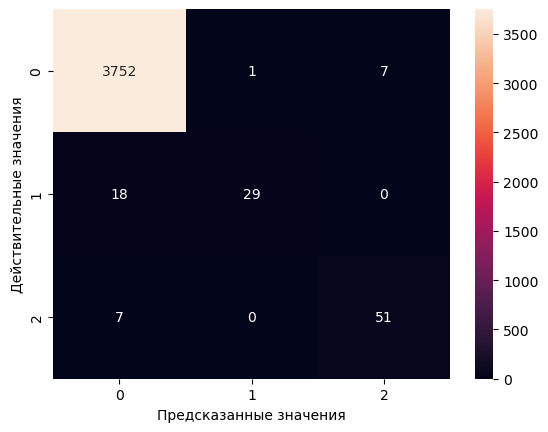

In [296]:
sns.heatmap(contingency_matrix(y_test, y_pred), annot=True, fmt='g')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

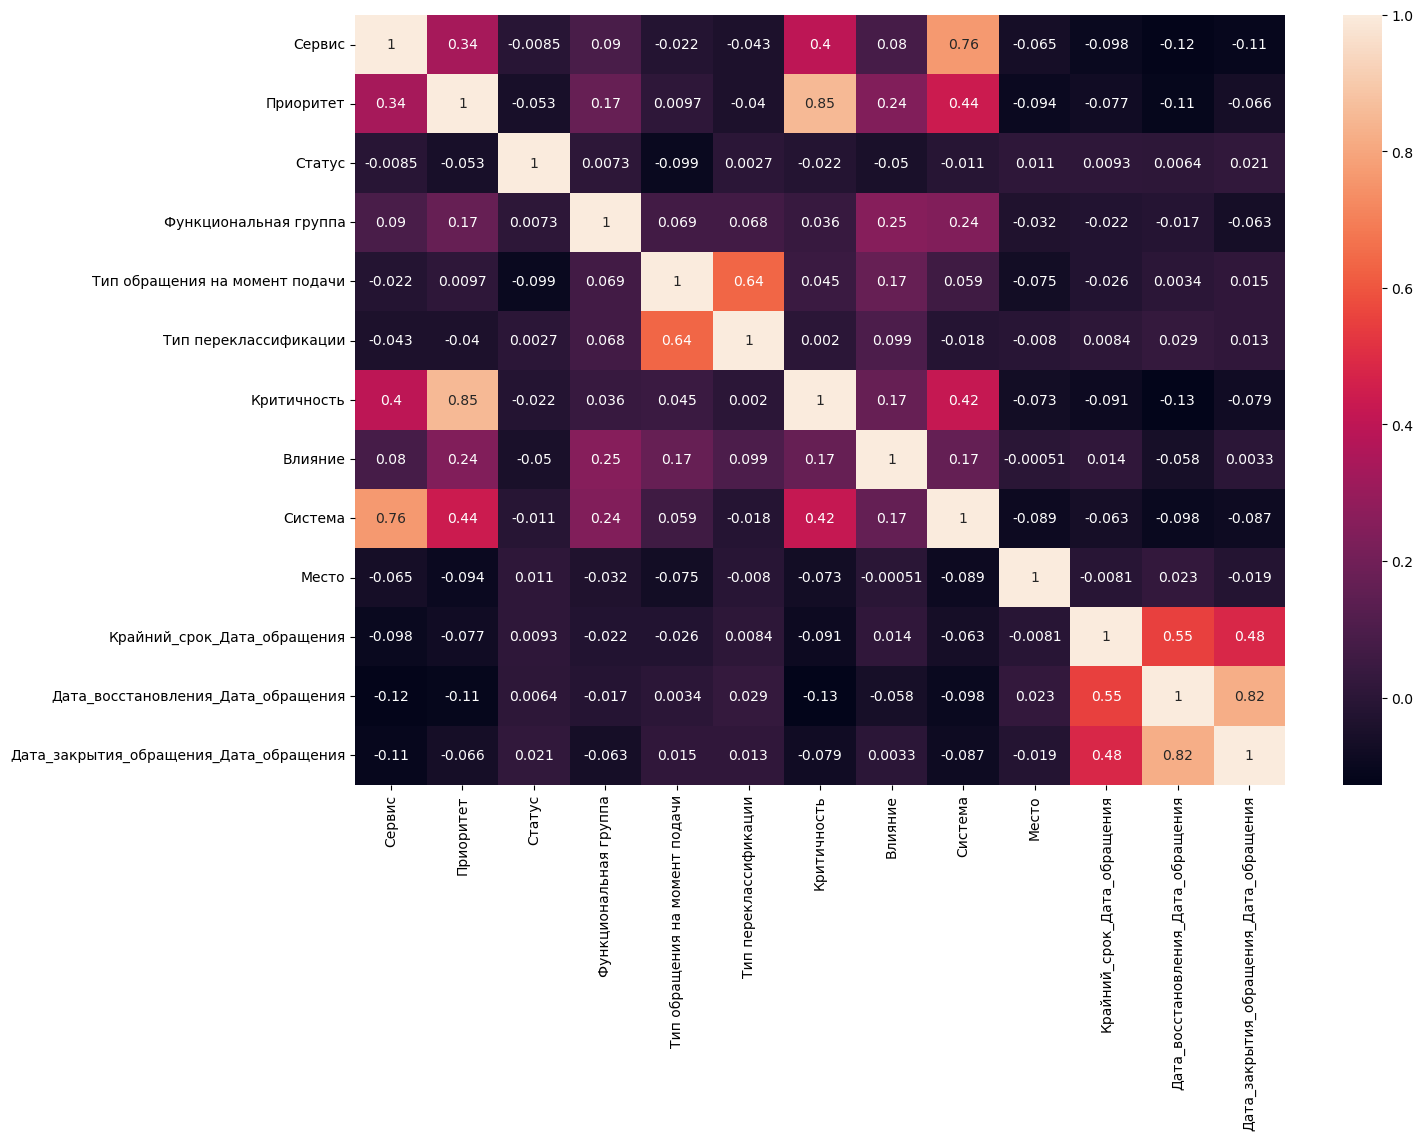

In [297]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True, fmt='.2g')
plt.show()

# Предсказание на тестовой выборке

In [298]:
clf = xgb.XGBClassifier(random_state=73)
clf.fit(train.drop('Тип переклассификации', axis=1), train['Тип переклассификации'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [299]:
pred = clf.predict(test)

In [300]:
submission['Тип переклассификации'] = pred
submission['Тип обращения итоговый'] = test['Тип обращения на момент подачи']

In [301]:
conditions  = [submission['Тип переклассификации'] == 0, submission['Тип переклассификации'] == 2, submission['Тип переклассификации'] == 1]
choices     = [submission['Тип обращения итоговый'], 'Запрос', 'Инцидент'] 
submission['Тип обращения итоговый'] = np.select(conditions, choices)

In [302]:
submission.replace({'Тип обращения итоговый': {'0': 'Запрос', '1': 'Инцидент'}}, inplace=True)
submission

,id,Тип переклассификации,Тип обращения итоговый
0,14803,0,Запрос
1,14804,0,Запрос
2,14805,0,Запрос
3,14806,0,Запрос
4,14807,0,Запрос
...,...,...,...
6339,21142,0,Инцидент
6340,21143,2,Запрос
6341,21144,0,Инцидент
6342,21145,0,Инцидент


# Сохранение предсказания

In [306]:
submission.to_csv('pred_submission.csv', sep=',', encoding='utf-8', index=False)